# Assignment 1.1: Exploring WS and BA models


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 


> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

The Random network model doesn't reflect the disparities between different individuals when it comes to their number of connections/friedns. According to the model, for an average number of connections a person has (\<k>) , the dispersion (σk = ‹k›1/2 ) would be around 31.62. 

So the number of friends a typical individual has would tipically vary between 968 and 1032. Whis is far from the truth as many people have many more friends or connections (for example, the large number of people that reach facebook's limit of 5000 friends) and others have significantly less by living isolated more lives.

> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.

The 4 regimes in the evolution of a random network:

- **Subcritical: 0 < k < 1:**
    - Each node has, on average, less than one link
    - These networks have multiple tiny and disconnected clusters
    - They don't present giant components
- **Critical Point: <k> = 1:**
    
    - On average each node is connected to 1 single node
    - The largest component contains only a small fraction of the nodes (NG​∼N^(2/3)) 
    - The network shows a wider range of sizes
    - This point separates the regime where there isn't a giant component, from the one where there is one

- **Supercritical: <k> > 1:** 
    - Includes a giant component
    - Made up of mostly trees, small elements are residual
    - The higher <k> is (furtehr away from the threshold), the bigger the gian component becomes

- **Connected <k> > ln(N):**

    - There are no isolated nodes left as they have all been absorbed by the giant component
    - Every node can access every other node (the network is connected)
    

> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

- The random network model fail to show the degree-dependent clustering observed in real-world networks. 
    - In real networks, high-degree nodes tend to have lower clustering coefficients (𝐶(𝑘) - C(k) decreases with k).
    - In a random network, 𝐶(𝑘) is independent of node degree (𝐶𝑖=𝑝=⟨𝑘⟩/𝑁).

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 


Average shortest path length for ws1: 62.88
Average shortest path length for ws2: 8.07
Average shortest path length for ws3: 4.74


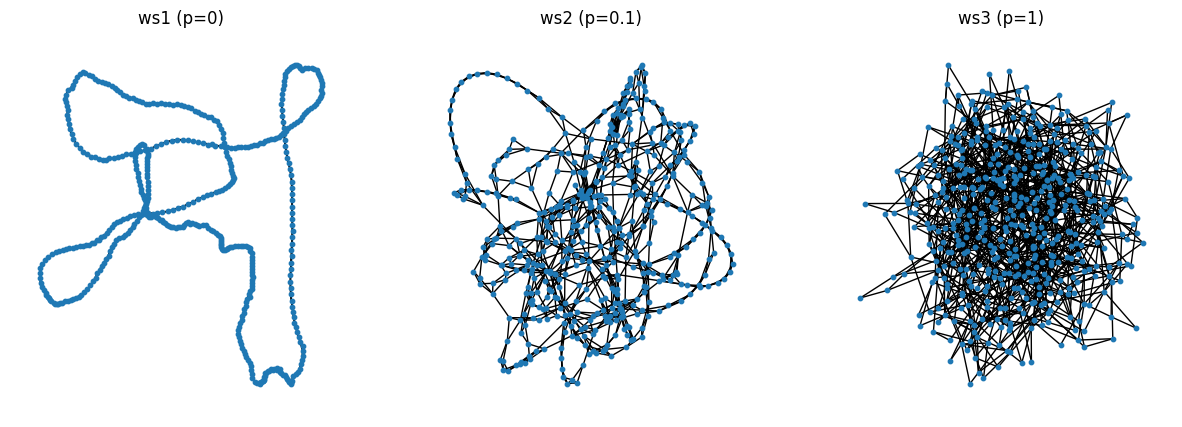

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 1
# Generating watts strogatz graph

ws1 = nx.watts_strogatz_graph(500, 4, 0)
ws2 = nx.watts_strogatz_graph(500, 4, 0.1)
ws3 = nx.watts_strogatz_graph(500, 4, 1)

# Calculate the average shortest path length
l1 = nx.average_shortest_path_length(ws1)
l2 = nx.average_shortest_path_length(ws2)
l3 = nx.average_shortest_path_length(ws3)

print(f"Average shortest path length for ws1: {l1:.2f}")
print(f"Average shortest path length for ws2: {l2:.2f}")
print(f"Average shortest path length for ws3: {l3:.2f}")

# Plotting the 3 graphs
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
nx.draw(ws1, node_size=10)
plt.title("ws1 (p=0)")
plt.subplot(1, 3, 2)
nx.draw(ws2, node_size=10)
plt.title("ws2 (p=0.1)")
plt.subplot(1, 3, 3)
nx.draw(ws3, node_size=10)
plt.title("ws3 (p=1)")
plt.show()

> * Describe what happens to the network when $p = 1$.

- If p (probability of rewiring) is 1, we get a fully random network, where all nodes are randomly linked together.
- Essentially, we get an Erdős–Rényi random network.

An example is shown below:


> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$.


p=0.1: Average shortest path length = 7.30
p=0.2: Average shortest path length = 6.18
p=0.3: Average shortest path length = 5.40
p=0.4: Average shortest path length = 5.22
p=0.5: Average shortest path length = 5.00
p=0.6: Average shortest path length = 4.86
p=0.7: Average shortest path length = 4.78
p=0.8: Average shortest path length = 4.80
p=0.9: Average shortest path length = 4.77
p=1.0: Average shortest path length = 4.78


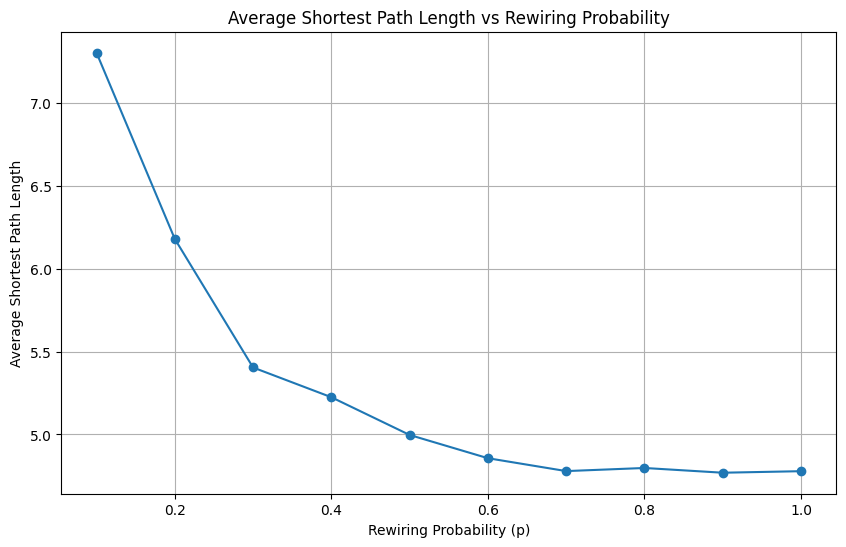

In [6]:
# Trying different value of p
# Try more values of p for finer resolution
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
avg_shortest_path_lengths = []

for p in p_values:
    ws = nx.watts_strogatz_graph(500, 4, p)
    avg_length = nx.average_shortest_path_length(ws)
    avg_shortest_path_lengths.append(avg_length)
    print(f"p={p}: Average shortest path length = {avg_length:.2f}")
    
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, avg_shortest_path_lengths, marker='o')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs Rewiring Probability')
plt.grid(True)
plt.show()

 > * What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

- The average shortest path length reaches values close to a fully randomized network (p = 1.0) when p ≈ 0.6. 
- After this value, increasing p doesn't show a significant reduction in average path length.

> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).


In [7]:
n_networks = 50
p_values = [0, 0.01, 0.03, 0.05,  0.1, 0.2]
avg_shortest_path_lengths = []
stds = []

# Generate N networks for each p and compute the average shortest path length
for p in p_values:
    lengths = []
    
    # Generate 50 networks and calculate their average shortest path lengths <d>
    for i in range(n_networks):
        ws = nx.watts_strogatz_graph(500, 4, p)
        length = nx.average_shortest_path_length(ws)
        lengths.append(length)
    avg_length = sum(lengths) / n_networks
    
    # Caculate standard deviation
    std = (sum((x - avg_length) ** 2 for x in lengths) / n_networks) ** 0.5
    
    # Save results
    avg_shortest_path_lengths.append(avg_length)
    stds.append(std)
    print(f"p={p}: Average shortest path length over {n_networks} networks = {avg_length:.2f}")
    print(f"p={p}: Standard deviation = {std:.2f}")

p=0: Average shortest path length over 50 networks = 62.88
p=0: Standard deviation = 0.00
p=0.01: Average shortest path length over 50 networks = 23.86
p=0.01: Standard deviation = 4.29
p=0.03: Average shortest path length over 50 networks = 12.45
p=0.03: Standard deviation = 1.16
p=0.05: Average shortest path length over 50 networks = 10.33
p=0.05: Standard deviation = 0.62
p=0.1: Average shortest path length over 50 networks = 7.73
p=0.1: Standard deviation = 0.32
p=0.2: Average shortest path length over 50 networks = 6.16
p=0.2: Standard deviation = 0.13


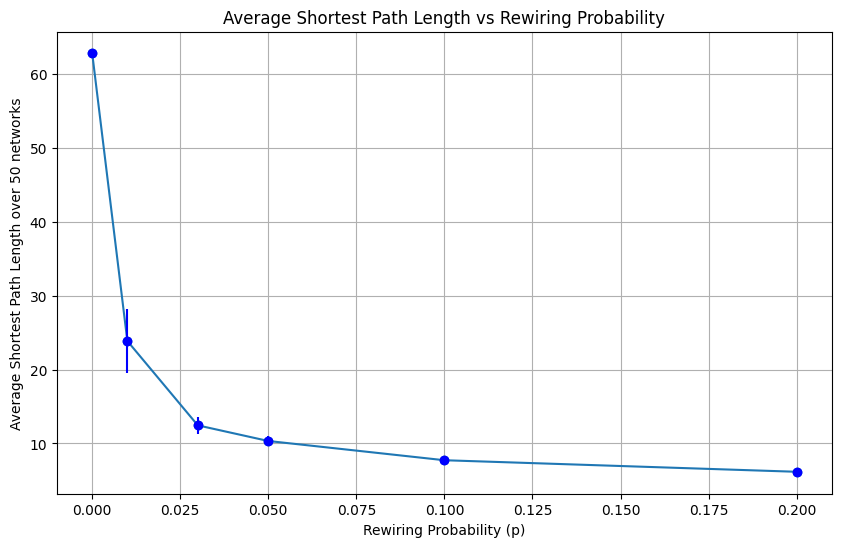

In [8]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, avg_shortest_path_lengths, marker='o')

# Add the error bars to the plot
plt.errorbar(p_values, avg_shortest_path_lengths, yerr = stds, fmt ='o', color ='blue')

plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length over 50 networks')
plt.title('Average Shortest Path Length vs Rewiring Probability')
plt.grid(True)
plt.show()

> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.


**Average shortest path length versus rewiring probability in Watts-Strogatz networks** 

This plots presents the evolution of the average shortest path length (across 50 networks with 500 nodes each and a mean degree of 4) as a function of the rewiring probability (p). The error bars show 1 standard deviation.

- At p = 0, the network is a regular ring lattice with long path lengths (⟨d⟩ = 62.88). 
- At = 0.01 (1% of edges are rewired randomly), the path lenght decreases drastically to 23.86. 
- Around p = 0,05 (5% of edges rewired), the average shortest path length is 10.33.

This fast decrease demonstrates thethe small-world phenomenon, which shows that introducing just a few random connections into a regular network can dramatically reduce path lengths, creating "shortcuts" that strongly enable global communication among distant nodes.

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
>

> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> 

The behavior of scale-free networks depends on the degree exponent γ, with the maximum degree $k_{\max}$ being defined as:  

$$
k_{\max} = k_{\min} N^{\tfrac{1}{\gamma - 1}}
$$  

We can define three slope-dependent regimes, depending on the value of $\gamma$:

 1. **Anomalous Regime (γ ≤ 2)**
    - The average degree ⟨k⟩ diverges as \(N \to \infty\).  
    - The exponent 1/(γ− 1) in (4.18) is larger than one so the largest hub grows faster than \(N\), eventually requiring more nodes than exist.   

2. **Scale-Free Regime (2 < γ < 3)**
    - Average node link ⟨k⟩ is finite, but higher moments (such as ⟨k²⟩) do diverge.  
    - The largest hub grows sublinearly with \(N\) since the exponent will be smaller than 1, and its relative share decreases (the fraction of its connections in the network shrinks).  

3. **Random Network Regime (γ > 3)**
    - Both two first moments (⟨k⟩ and ⟨k²⟩) are finite.  
    - Hubs are small and rare because the growth of the largest node is extremely slow.  
    - As a result, these networks behave similarly to **random networks**, with the small world properties.


> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.


In the non-linear preferential attachment model, the probability that a new node connects to an existing node (i) depends on its degree (k_i) raised to a power (\alpha):

$$
\Pi(k_i) = \frac{k_i^{\alpha}}{\sum_j k_j^{\alpha}}
$$

Depending on the value of (\alpha), it is possible to identify 3 different regimes.

1.  **Sub-linear regime ($0 < \alpha < 1$)**

- High-degree nodes are not strongly favored compared to low-degree ones.
- The "rich-get-richer" effect is weak.
- Degree distribution is stretched exponential (not a pure power law):

$$
P(k) \sim \exp\left(-c , k^{1-\alpha}\right)
$$

- Networks are more homogeneous, hubs do not dominate.


2.  **Linear regime ($\alpha = 1$)**

- This is the Barabási–Albert model.
- Probability of acquiring links is exactly proportional to degree.
- Degree distribution follows a scale-free power law:

$$
P(k) \sim k^{-3}
$$
- Networks display hubs with a wide range of connectivity.


3. **Super-linear regime ($\alpha > 1$)**

- High-degree nodes are disproportionately favored.
- Leads to condensation or winner-takes-all behavior, which means that one or very few nodes capture a macroscopic fraction of all links.
- Degree distribution no longer follows a power law, instead, a single hub dominates while most nodes remain with low degree.
